<a href="https://colab.research.google.com/github/Ikhtiyor31/Deep-Learning/blob/master/MNIST_handwritten_digit_model_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torchvision.datasets import MNIST
import torchvision.transforms as transforms


In [2]:
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)
dataset


Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [9]:
training_set = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [12]:

from torch.utils.data import random_split
images, label = training_set[0]
print(images.shape, label)


torch.Size([1, 28, 28]) 5


In [13]:

training_set, validation_set = random_split(training_set, (50000, 10000))

In [14]:
print("number of training examples: ", len(training_set))
print("number of validation examples: ", len(validation_set))

number of training examples:  50000
number of validation examples:  10000


In [15]:
len(validation_set)
batch_size = 128


In [16]:
training_loader = DataLoader(training_set, batch_size, shuffle=True);

In [17]:
validation_loader= DataLoader(validation_set, batch_size)

In [18]:
input_size = 28*28
num_class = 10
model = nn.Linear(input_size, num_class)

In [19]:
len(training_loader)

391

In [23]:
for images, labels in training_loader:
  print(label)
  print(images.shape)
  m = images.reshape(128, 784)
  print(m.shape)
  outputs = model(m)
  break


loss_func = F.cross_entropy
loss = loss_func(outputs, labels)
accuracy(outputs, labels)


5
torch.Size([128, 1, 28, 28])
torch.Size([128, 784])


tensor(0.1172)

In [24]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_class)
  def forward(self, x):
    x = x.reshape(-1, 784)
    
    out = self.linear(x);
    return out
model = MnistModel()    


In [25]:
model



MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [28]:
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_class)
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out  
  def training_steps(self, batch):
    images, label = batch
    out = self(images) # generate predictions
    loss= F.cross_entropy(out, label) # calculate the losses
    return loss
  def validate_step(self, batch):
    images, label = batch
    out = self(images) # generates predictions
    loss = F.cross_entropy(out, label)
    acc = accuracy(out, label)
    return {'val_loss': loss, 'val_acc':acc}
  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss =    torch.stack(batch_losses).mean() # combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean() # combine accuracy
    return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}
  def epoch_end(self, epoch, result):
    print("Epoch: [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
model1 = MNISTModel()      



In [29]:
model1

MNISTModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [30]:
def evaluate(models, val_loader):
  outputs = [models.validate_step(batch) for batch in val_loader]
  return models.validation_epoch_end(outputs)

In [31]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
def fit(num_epochs, model1, train_loader, validation_loader, opt_func=torch.optim.Adam):
 
  history = []
  optimizer = opt_func(model1.parameters(), 0.001);
  for epoch in range(num_epochs):
    #training phase 
    for batch in train_loader:
      loss = model1.training_steps(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #validation phase
    result = evaluate(model1, validation_loader)
    model1.epoch_end(epoch, result)
    history.append(result)
  return history      

In [35]:

history = fit(10, model1, training_loader, validation_loader)

Epoch: [0], val_loss: 0.2885, val_acc: 0.9222
Epoch: [1], val_loss: 0.2889, val_acc: 0.9216
Epoch: [2], val_loss: 0.2886, val_acc: 0.9229
Epoch: [3], val_loss: 0.2889, val_acc: 0.9225
Epoch: [4], val_loss: 0.2899, val_acc: 0.9237
Epoch: [5], val_loss: 0.2891, val_acc: 0.9242
Epoch: [6], val_loss: 0.2890, val_acc: 0.9227
Epoch: [7], val_loss: 0.2886, val_acc: 0.9240
Epoch: [8], val_loss: 0.2906, val_acc: 0.9223
Epoch: [9], val_loss: 0.2893, val_acc: 0.9237


In [36]:
len(training_loader)
len(validation_loader)

79

In [37]:
result0 = evaluate(model1, validation_loader)
result0

{'val_acc': 0.923655092716217, 'val_loss': 0.2893276810646057}

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

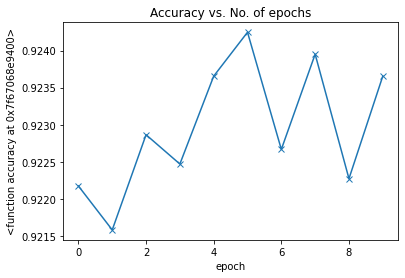

In [39]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel(accuracy)
plt.title('Accuracy vs. No. of epochs')

In [40]:
def predicted(model, img):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, pred = torch.max(yb, dim=1)
  return pred[0].item()

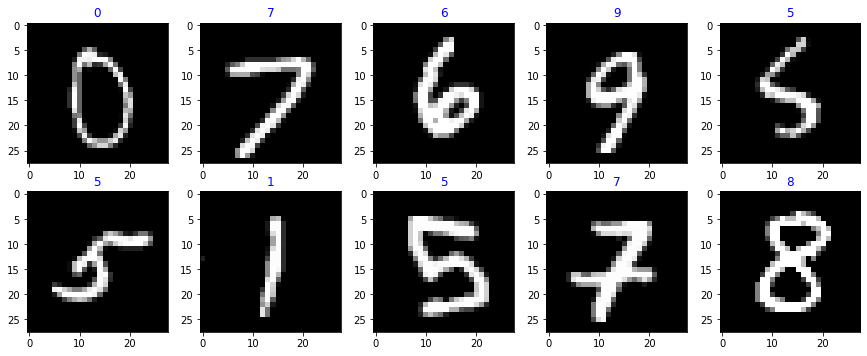

In [70]:
#image, label = training_set[434]
##plt.imshow(image[0], cmap='gray')

plt.figure(figsize=(15,15))
for indx in range(0, 10):
  image, label = training_set[indx+1000]
  plt.subplot(5,5, indx + 1)
  plt.title(label, color='r')
  if(label == predicted(model1, image)):
    plt.title(predicted(model1, image), color='b')
  else:
    plt.title(predicted(model1, image), color='r')
  plt.imshow(image[0], cmap='gray')
plt.show()  